# Ejercicios de preprocesado de datos

## Introducción a _python_

Cargar el fichero de Sentry: Earth Impact Monitoring que están en "cneos_sentry_summary_data.csv" (Fuente: [Center for Near Earth Object Studies - NASA](https://cneos.jpl.nasa.gov/sentry/#legend)).Calcular:

- Probabilidad media de que impacte algún objeto en la Tierra.
- Diámetro máximo de los objetos recogidos en la base de datos.
- Rango medio de años en formato `[min_year, max_year]`.
- Nombre del objeto que viaja a mayor velocidad.

### Lectura de fichero y creación de estructura de datos

In [2]:
# Creación de estructura de datos
dataset = []

# Lectura de fichero
with open('../../data/cneos_sentry_summary_data.csv', 'r') as file:
    # Lectura de cabecera
    header = file.readline().strip().split(',')
    # Lectura de datos
    for line in file:
        line = line.strip()
        line = [val.removeprefix('"').removesuffix('"') for val in line.split(',')] 
        dataset.append({
            'Object Designation': line[0],
            'Year Range': [int(value) for value in line[1].split('-')],
            'Potential Impacts': int(line[2]),
            'cum Impact Probability': float(line[3]),
            'V_infinity': float(line[4]),
            'H': float(line[5]),
            'Estimated Diameter': float(line[6]),
            'cum Palermo Scale': float(line[7]),
            'max Palermo Scale': float(line[8]),
            'max Torino Scale': int(line[9]) if line[9] != '' else 0,
        })

### Probabilidad media de que impacte algún objeto en la tierra

In [3]:
impact_probability = sum([row['cum Impact Probability'] for row in dataset]) / len(dataset)

print(f'Probabilidad media de impacto: {impact_probability * 100:.4f}%')

Probabilidad media de impacto: 0.5233%


### Diámetro máximo de los objetos recogidos

In [4]:
max_diameter = max([row["Estimated Diameter"] for row in dataset])

print(f'Diametro maximo de objetos: {max_diameter} Km')

Diametro maximo de objetos: 1.3 Km


### Rango medio de años en formato `[min_year, max_year]`

In [5]:
lower_bound = sum(row['Year Range'][0] for row in dataset) / len(dataset)
upper_bound = sum(row['Year Range'][1] for row in dataset) / len(dataset)

years_range = [lower_bound, upper_bound]

print(f'Rango medio de años: {years_range}')

Rango medio de años: [2095.8, 2136.44]


### Nombre del objeto que viaja a mayor velocidad

In [6]:
fastest_item = max(
    dataset,
    key = lambda x: x.get('V_infinity')
)

print(f'Objeto mas veloz del conjunto de datos: {fastest_item["Object Designation"]}')

Objeto mas veloz del conjunto de datos: (2022 PX1)


## La librería _pandas_

Para el conjunto de datos de apps de Google Play 'googleplaystore.csv':

- Crear un dataframe a partir del csv 'googleplaystore.csv'
- Obtener el tipo de todas las columnas
- Comprobar el número de valores nulos que tienen las columnas
- Obtener el número de apps que no tienen ninguna review

### Crear un dataframe a partir del csv 'googleplaystore.csv'

In [7]:
import pandas as pd

dataset = pd.read_csv('../../data/app_store_transformed.csv')

display(dataset)

,Unnamed: 0,Id,App,Reviews,Rating,Current Version,Category,Type,Size,Price,Content Rating
0,1,281656475,PAC-MAN Premium,21292,4.0,6.3.5,Games,Paid,96.1M,3.99$,Everyone
1,2,281796108,Evernote - stay organized,161065,4.0,8.2.2,Productivity,Free,151.2M,0.0$,Everyone
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",188583,3.5,5.0.0,Weather,Free,95.9M,0.0$,Everyone
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",262241,4.0,5.10.0,Shopping,Free,122.6M,0.0$,Everyone 12+
4,5,282935706,Bible,985920,4.5,7.5.1,Reference,Free,88.5M,0.0$,Everyone
...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,142,4.5,1.3,Games,Free,120.8M,0.0$,Everyone
7193,11082,1187682390,VR Roller-Coaster,30,4.5,0.9,Games,Free,115.2M,0.0$,Everyone
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,15,4.5,1.0.2,Utilities,Paid,106.2M,1.99$,Teen
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,85,4.5,1.0.15,Games,Free,92.7M,0.0$,Everyone 12+


### Obtener el tipo de todas las columnas

In [8]:
display(dataset.dtypes)

Unnamed: 0           int64
Id                   int64
App                 object
Reviews              int64
Rating             float64
Current Version     object
Category            object
Type                object
Size                object
Price               object
Content Rating      object
dtype: object

### Comprobar el número de valores nulos que tienen las columnas

In [9]:
display(dataset.isnull().sum())

Unnamed: 0         0
Id                 0
App                0
Reviews            0
Rating             0
Current Version    0
Category           0
Type               0
Size               0
Price              0
Content Rating     0
dtype: int64

### Obtener el número de apps que no tienen ninguna review

In [10]:
unreviewed_apps = dataset.loc[dataset['Reviews'] == 0].shape[0]

print(f'Numero de apps sin review asociadas: {unreviewed_apps}')

Numero de apps sin review asociadas: 929


## Las librerías _matplotlib_ y _plotly_

Para el conjunto de datos de apps de Google Play 'googleplaystore.csv':

- Realizar un gráfico histograma de la variable "Rating" de las apps
- Realizar un diagrama de barras de la variable "Category" de las apps
- Realizar un gráfico de dispersión de "Rating" vs "Reviews"
- (OPCIONAL) Realizar otro gráfico de los vistos anteriormente utilizando otras variables del dataset.

### Realizar un gráfico histograma de la variable "Rating" de las apps

Text(0, 0.5, 'Frecuencia')

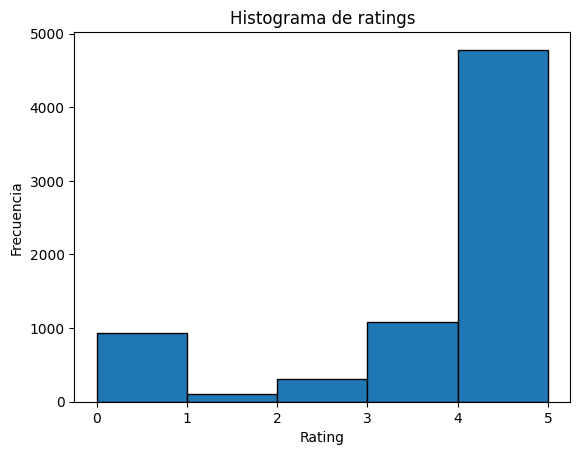

In [11]:
import matplotlib.pyplot as plt

# Calculo de los intervalos (se podria hacer a mano)
min_rating = int(dataset['Rating'].min())
max_rating = int(dataset['Rating'].max())
interval = [i for i in range(min_rating, max_rating + 1)]

# Creacion del histograma
plt.hist(
    dataset['Rating'],
    bins = interval,
    edgecolor = 'black',
)

# Decoracion del histograma
plt.title('Histograma de ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')

### Realizar un diagrama de barras de la variable "Category" de las apps

Text(0, 0.5, 'Categoria')

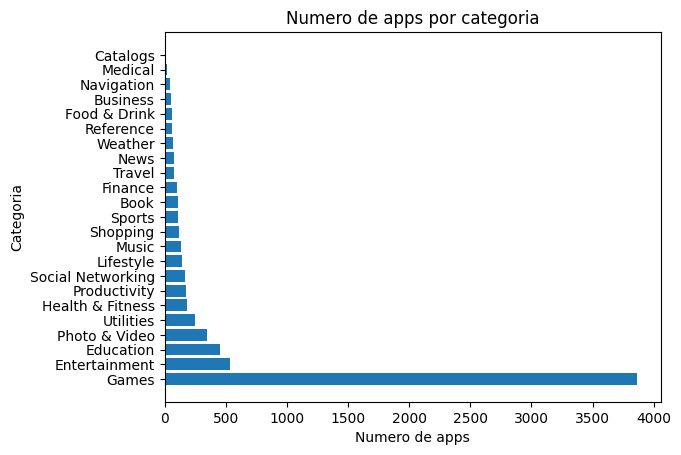

In [12]:
# Creacion de la figura
# * Debe ser barh en vez de bar para permitir que se lean las categorias
plt.barh(
    dataset['Category'].value_counts().keys(),
    dataset['Category'].value_counts().values,
)

# Decoracion de la figura
plt.title('Numero de apps por categoria')
plt.xlabel('Numero de apps')
plt.ylabel('Categoria')

### Realizar un gráfico de dispersión de "Rating" vs "Reviews"

Text(0, 0.5, 'Reviews')

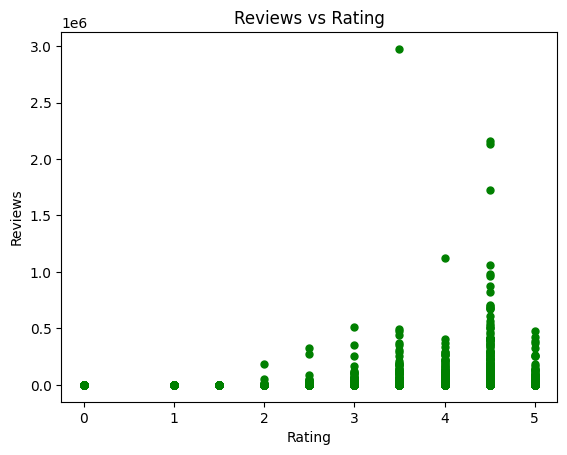

In [13]:
# Obtener los valores de las columnas
rating_values = dataset['Rating'].tolist()
reviews_values = dataset['Reviews'].tolist()

# Creación de la figura
plt.scatter(
    rating_values,
    reviews_values,
    c = 'green',
    marker = '.',
    s = 100
)

# Decoracion de la figura
plt.title('Reviews vs Rating')
plt.xlabel('Rating')
plt.ylabel('Reviews')

### Realizar otro gráfico de los vistos anteriormente utilizando otras variables del dataset.

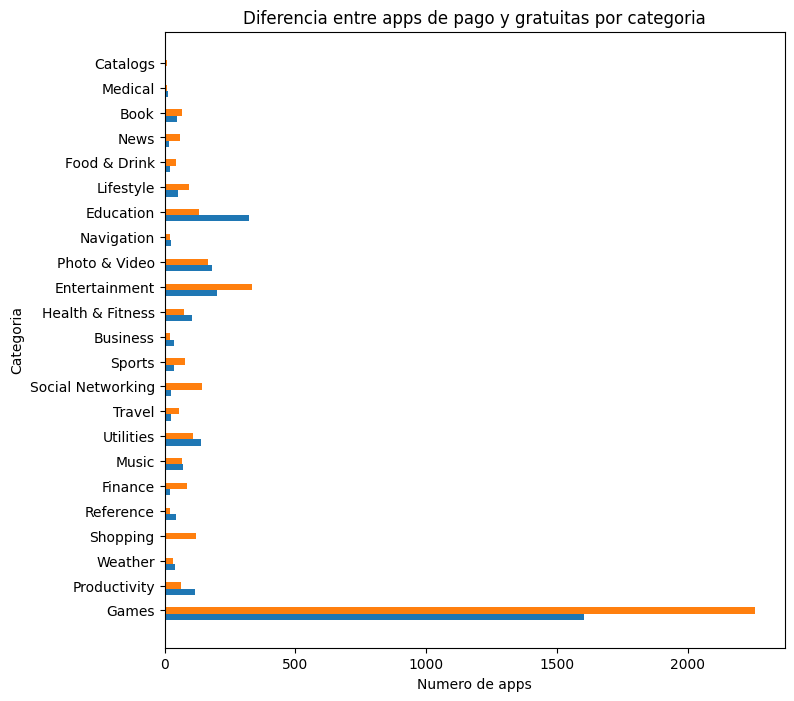

In [33]:
import numpy as np

CHART_SIZE = 8

# Get for each category the number of Paid and Free apps
types_per_category = dataset.groupby('Category')['Type'].value_counts()

categories = dataset['Category'].unique()

paid_apps = types_per_category.loc[categories, 'Paid'].tolist()
free_apps = types_per_category.loc[categories, 'Free'].tolist()

fig, ax = plt.subplots()

# Size of the chart
fig.set_size_inches(CHART_SIZE, CHART_SIZE)

x = np.arange(len(categories))
width = 0.25

# Barras de pago
rects = ax.barh(
    x,
    paid_apps,
    width,
    label = 'Paid'
)

# Barras gratuitas
rects = ax.barh(
    x + width,
    free_apps,
    width,
    label = 'Free'
)

# Decoracion de la figura
ax.set_title('Diferencia entre apps de pago y gratuitas por categoria')
ax.set_xlabel('Numero de apps')
ax.set_ylabel('Categoria')
ax.set_yticks(x + width, categories)